# <center><font size=6> Assignment: CNN and RNN </font></center>
<center><font size=3><i>By Dat Mai and Jiye Lyu </i></font></center>  

<center><font size=3><i>04/30/2021</i></font></center>

---

# Problem 1 (15 points)

Choose a small (< 3, 000) image dataset for classification. Include the link where you have downloaded the pictures from. Use a CNN to train the model.

1. Plot the loss and accuracy curves for training and validation sets.

2. Explain if you observe any overfitting and why.

3. Report the model accuracy on the test set. Include the confusion matrix.

https://www.kaggle.com/bitthal/hand-gesture-dataset

In [1]:
import keras
from keras import models
from keras import layers
from keras import optimizers
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt

In [2]:
from PIL import Image
import numpy as np

def loadImage(name):

    im = Image.open(name)
    im = im.convert("L") 
    data = im.getdata()
    data = np.matrix(data)
    data = np.reshape(data,(50,50))
    new_im = Image.fromarray(data)
    return data

In [3]:
import os
filePath = 'C:\\Users\\61633\\Desktop\\SemesterII\\AdvancedML\\HW3\\gesture_small'
filenamelist = os.listdir(filePath)
imagellist = []
label = []

In [4]:
for foldername in filenamelist:
    subfilePath = 'C:\\Users\\61633\\Desktop\\SemesterII\\AdvancedML\\HW3\\gesture_small'+ '\\' + foldername
    subfilenamelist = os.listdir(subfilePath)
    
    for name in subfilenamelist:
        label.append(foldername)
        
        image00 = loadImage(subfilePath + '\\' + name)
        imagellist.append(image00)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(imagellist, label, test_size = 0.3, random_state = 0)

In [6]:
x_train = np.array(X_train)
x_train.shape

(1187, 50, 50)

In [7]:
x_test = np.array(X_test)
x_test.shape

(510, 50, 50)

In [8]:
x_train = x_train.reshape((1187,50,50,1))
x_train = x_train/255

x_test = x_test.reshape((510,50,50,1))
x_test = x_test/255

y_train = to_categorical(Y_train,11)
y_test = to_categorical(Y_test,11)

In [9]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(filters =32, 
                        kernel_size = (3,3),
                        activation = 'relu',
                        input_shape = (50,50,1)))

model.add(layers.MaxPooling2D(pool_size = (2,2)))

model.add(layers.Conv2D(filters = 64,
                       kernel_size = (3,3),
                       activation = 'relu'))

model.add(layers.MaxPooling2D(pool_size = (2,2)))

model.add(layers.Conv2D(filters = 64,
                       kernel_size =  (3,3),
                       activation = 'relu'))

In [11]:
model.add(layers.Flatten())
model.add(layers.Dense(units = 64, activation = 'relu'))
model.add(layers.Dense(units = 11, activation = 'softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 5184)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [13]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

finalmodel = model.fit(x_train, y_train, batch_size = 64, epochs = 5, validation_split = 1/6,verbose = 1)

Epoch 1/5
16/16 [==============================] - 1s 59ms/step - loss: 1.3468 - accuracy: 0.5440 - val_loss: 0.6460 - val_accuracy: 0.8030
Epoch 2/5
16/16 [==============================] - 1s 49ms/step - loss: 0.2383 - accuracy: 0.9282 - val_loss: 0.1408 - val_accuracy: 0.9596
Epoch 3/5
16/16 [==============================] - 1s 51ms/step - loss: 0.1368 - accuracy: 0.9626 - val_loss: 0.0728 - val_accuracy: 0.9899
Epoch 4/5
16/16 [==============================] - 1s 51ms/step - loss: 0.0385 - accuracy: 0.9899 - val_loss: 0.0511 - val_accuracy: 0.9848
Epoch 5/5
16/16 [==============================] - 1s 51ms/step - loss: 0.0714 - accuracy: 0.9808 - val_loss: 0.0547 - val_accuracy: 0.9899


## 1.Plot the loss and accuracy curves for training and validation sets.

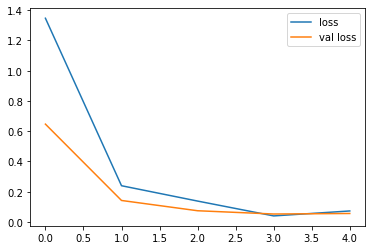

In [14]:
plt.plot(finalmodel.history['loss'],label = 'loss')
plt.plot(finalmodel.history['val_loss'],label = 'val loss')
plt.legend()
plt.show()

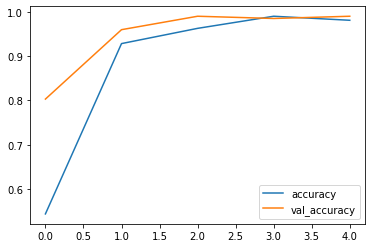

In [15]:
plt.plot(finalmodel.history['accuracy'],label = 'accuracy')
plt.plot(finalmodel.history['val_accuracy'],label = 'val_accuracy')
plt.legend()
plt.show()

##  2. Explain if you observe any overfitting and why.

##### It seems that there is no overfitting because the distance between loss curves are not very obvious. And the curves don't split at the end.

## 3. Report the model accuracy on the test set. Include the confusion matrix.

In [16]:
test_loss, test_acc= model.evaluate(x_test,y_test)

print('Model performance on the test set is as follows: test loss =',
      round(test_loss,2)," and the best accuracy =", round(test_acc,2))

16/16 [==============================] - 0s 7ms/step - loss: 0.0736 - accuracy: 0.9824
Model performance on the test set is as follows: test loss = 0.07  and the best accuracy = 0.98


In [17]:
import numpy as np
from sklearn.metrics import confusion_matrix

In [18]:
y_predict = model.predict(x_test)

In [19]:
y_predict = np.argmax(y_predict,axis=1)

In [20]:
Y_test = list(map(int,Y_test))

In [21]:
cm = confusion_matrix(Y_test, y_predict)

print("Confusion matrix,without normalization")
print(cm)

Confusion matrix,without normalization
[[33  0  1  0  0  0  0  0  0  0]
 [ 0 53  0  0  0  0  0  0  0  0]
 [ 0  0 52  0  0  0  0  0  0  0]
 [ 0  0  0 31  0  0  0  0  0  0]
 [ 0  0  0  0 52  0  0  0  0  0]
 [ 0  0  0  0  6 50  0  0  0  0]
 [ 0  0  0  0  0  0 61  0  0  0]
 [ 0  1  0  1  0  0  0 35  0  0]
 [ 0  0  0  0  0  0  0  0 67  0]
 [ 0  0  0  0  0  0  0  0  0 67]]


# Problem 2 (25 points)

For this problem you use the data in “admData20.csv” on Canvas. This file contains information about the admission data for an academic program at a college that has 5 start dates throughout the year.

The features in the file include the start date, the weekly statistics on the accumulative number of students who applied and admitted for a specific start date (time-series), the number of weeks before the start date, and the budget value for the number of admissions for the given start date.

The objective of the problem is to predict the accumulative number of admissions 1-5 weeks from the current date. i.e. on any given week, you need to forecast what the accumulative number of admissions will be in 1 week, 2 weeks, . . . 5 weeks from that week.

In [22]:
import pandas as pd

In [23]:
data = pd.read_csv('admData20.csv')

In [24]:
data.head()

,ExpStartDate,AdmittedNum,AppliedNum,WeeksBeforeStart,Budget
0,10/29/2018,3,61,10,87
1,10/29/2018,7,84,9,87
2,10/29/2018,10,90,8,87
3,10/29/2018,24,118,7,87
4,10/29/2018,39,132,6,87


In [25]:
Admited_Num = data['AdmittedNum']

## 1. Create a recurrent neural network model. Explore both gru and lstm layers.

In [26]:
from keras.models import Sequential
from keras.layers import LSTM,GRU,Dense
from keras.layers import Dropout, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import RepeatVector, Conv1D, MaxPooling1D, Conv2D, MaxPooling2D
from sklearn.preprocessing import MinMaxScaler

In [27]:
def createSeq(dataset, look_back = 1, foresight = 5):
    X, Y = [], []
    for i in range(len(dataset) - look_back - foresight):
        obs = dataset[i:(i + look_back),0]#Sequence of "look_back", in this case 7 stock prices
        X.append(obs)                     #Append stock price value occuring "foresight+1", in this case 4 time-steps into future
        Y.append(dataset[i + (look_back + foresight),0])
    
    return np.array(X),np.array(Y)

In [28]:
def LSTM_MAE(a,look_back,foresight):
    trainPortion = round(a.shape[0] * 0.7)
    valPortion = round(a.shape[0] * 0.15)
    trainData = a[:trainPortion]
    valData = a[trainPortion: trainPortion + valPortion]
    testData = a[trainPortion + valPortion:]

    sc = MinMaxScaler(feature_range=(0,1))

    trainData  =trainData.values
    trainData = trainData.reshape(-1,1)

    valData = valData.values
    valData = valData.reshape(-1,1)

    testData = testData.values
    testData = testData.reshape(-1,1)
    
    sc.fit(trainData)
    trainNorm = sc.transform(trainData)
    valNorm =sc.transform(valData)
    testNorm = sc.transform(testData)
    
    trainNormX, trainNormY = createSeq(trainNorm, look_back = look_back, foresight = foresight)
    valNormX, valNormY = createSeq(valNorm, look_back = look_back, foresight = foresight)
    testNormX, testNormY = createSeq(testNorm, look_back = look_back, foresight = foresight)
    
    trainNormX = np.reshape(trainNormX, (trainNormX.shape[0],trainNormX.shape[1],1))
    valNormX = np.reshape(valNormX, (valNormX.shape[0],valNormX.shape[1],1))
    testNormX = np.reshape(testNormX, (testNormX.shape[0],testNormX.shape[1],1))
    
    
    #__________LSTM
    model = Sequential()
    model.add(LSTM(32, input_shape = (look_back,1), dropout = 0.1, recurrent_dropout = 0.1))
    model.add(Dense(1,activation = 'linear'))
    model.compile(loss = 'mae',optimizer = 'adam', metrics = ['mean_absolute_error'])
    
    network_name = 'lstm'
    filepath = network_name + "_epoch -{epoch:02d}-loss-{loss:.4f}-.hdf5"
    checkpoint = ModelCheckpoint(filepath, monitor = 'loss',verbse = 0, save_best_only = True, mode = 'min')
    callbacks_list = [checkpoint]
    network = model.fit(trainNormX, trainNormY, verbose = 0,validation_data = (valNormX, valNormY),epochs = 20, 
                        batch_size = 20, callbacks = callbacks_list)
    
    LSTM_MAE =  model.evaluate(testNormX,testNormY)

    
    return LSTM_MAE[1]

In [29]:
def GRU_MAE(a,look_back,foresight):
    trainPortion = round(a.shape[0] * 0.7)
    valPortion = round(a.shape[0] * 0.15)
    trainData = a[:trainPortion]
    valData = a[trainPortion: trainPortion + valPortion]
    testData = a[trainPortion + valPortion:]

    sc = MinMaxScaler(feature_range=(0,1))

    trainData  =trainData.values
    trainData = trainData.reshape(-1,1)

    valData = valData.values
    valData = valData.reshape(-1,1)

    testData = testData.values
    testData = testData.reshape(-1,1)
    
    sc.fit(trainData)
    trainNorm = sc.transform(trainData)
    valNorm =sc.transform(valData)
    testNorm = sc.transform(testData)
    
    trainNormX, trainNormY = createSeq(trainNorm, look_back = look_back, foresight = foresight)
    valNormX, valNormY = createSeq(valNorm, look_back = look_back, foresight = foresight)
    testNormX, testNormY = createSeq(testNorm, look_back = look_back, foresight = foresight)
    
    trainNormX = np.reshape(trainNormX, (trainNormX.shape[0],trainNormX.shape[1],1))
    valNormX = np.reshape(valNormX, (valNormX.shape[0],valNormX.shape[1],1))
    testNormX = np.reshape(testNormX, (testNormX.shape[0],testNormX.shape[1],1))
    
    #__________GRU
    model = Sequential()
    model.add(GRU(32, input_shape = (look_back,1), dropout = 0.1, recurrent_dropout = 0.1))
    model.add(Dense(1,activation = 'linear'))
    model.compile(loss = 'mae',optimizer = 'adam', metrics = ['mean_absolute_error'])

    network_name = 'gru'
    filepath = network_name + "_epoch -{epoch:02d}-loss-{loss:.4f}-.hdf5"
    checkpoint = ModelCheckpoint(filepath, monitor = 'loss',verbse = 0, save_best_only = True, mode = 'min')
    callbacks_list = [checkpoint]
    network = model.fit(trainNormX, trainNormY, verbose = 0, validation_data = (valNormX, valNormY),epochs = 20, 
                        batch_size = 20, callbacks = callbacks_list)
    
    GRU_MAE =  model.evaluate(testNormX,testNormY)
    
    return  GRU_MAE[1]

In [30]:
trainPortion = round(Admited_Num.shape[0] * 0.7)
valPortion = round(Admited_Num.shape[0] * 0.15)
trainData = Admited_Num[:trainPortion]
valData = Admited_Num[trainPortion:trainPortion+valPortion]
testData = Admited_Num[trainPortion + valPortion:]
print('Train Dimension:',trainData.shape,'\nValidation Dimension:',valData.shape,'\nTest Dimension:',testData.shape)

Train Dimension: (103,) 
Validation Dimension: (22,) 
Test Dimension: (22,)


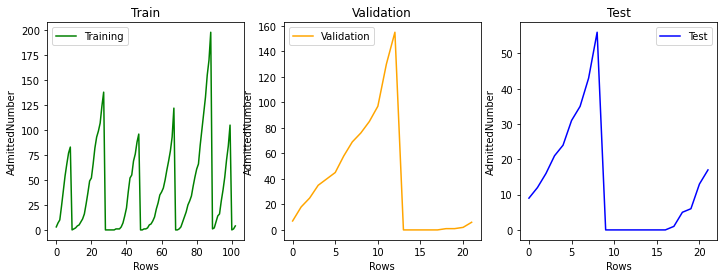

In [31]:
fig = plt.figure(figsize = (12,4))
plt.subplot(1,3,1)
plt.plot(range(trainData.shape[0]),trainData,color='green',label='Training')
plt.title('Train')
plt.xlabel('Rows')
plt.ylabel('AdmittedNumber')
plt.legend()
plt.subplot(1,3,2)
plt.plot(range(valData.shape[0]),valData,color='orange',label='Validation')
plt.title('Validation')
plt.xlabel('Rows')
plt.ylabel('AdmittedNumber')
plt.legend()
plt.subplot(1,3,3)
plt.plot(range(testData.shape[0]),testData,color='blue',label='Test')
plt.title('Test')
plt.xlabel('Rows')
plt.ylabel('AdmittedNumber')
plt.legend()
plt.show()

### (a) Report the MAE of the test set on your best model.


In [32]:
MAE = 1000
back = 3
fore = 0
LSTMMAE = 0
GRUMAE = 0

for j in range(5):
    
    mae1,mae2  = GRU_MAE(Admited_Num,back,j),LSTM_MAE(Admited_Num,back,j)
    
    GRUMAE+= mae1
    LSTMMAE+= mae2

if GRUMAE < LSTMMAE:
    print("GRU is better, the average mae is")
    mean_GRUMAE = GRUMAE/5
    print(mean_GRUMAE)
    
else:
    print("LSTM is better, the average mae is")
    mean_LSTMMAE = LSTMMAE/5
    print(mean_LSTMMAE)

1/1 [==============================] - 0s 2ms/step - loss: 0.1474 - mean_absolute_error: 0.1474
GRU is better, the average mae is
0.10743176639080047


### (b) Plot the loss curves for training and validation sets.


In [33]:
def return_GRU_PLOT(a,look_back,foresight):
    trainPortion = round(a.shape[0] * 0.7)
    valPortion = round(a.shape[0] * 0.15)
    trainData = a[:trainPortion]
    valData = a[trainPortion: trainPortion + valPortion]
    testData = a[trainPortion + valPortion:]
    
    sc = MinMaxScaler(feature_range=(0,1))

    trainData  =trainData.values
    trainData = trainData.reshape(-1,1)

    valData = valData.values
    valData = valData.reshape(-1,1)

    testData = testData.values
    testData = testData.reshape(-1,1)
    
    sc.fit(trainData)
    trainNorm = sc.transform(trainData)
    valNorm =sc.transform(valData)
    testNorm = sc.transform(testData)
    
    trainNormX, trainNormY = createSeq(trainNorm, look_back = look_back, foresight = foresight)
    valNormX, valNormY = createSeq(valNorm, look_back = look_back, foresight = foresight)
    testNormX, testNormY = createSeq(testNorm, look_back = look_back, foresight = foresight)
    
    trainNormX = np.reshape(trainNormX, (trainNormX.shape[0],trainNormX.shape[1],1))
    valNormX = np.reshape(valNormX, (valNormX.shape[0],valNormX.shape[1],1))
    testNormX = np.reshape(testNormX, (testNormX.shape[0],testNormX.shape[1],1))
    
    #__________GRU
    model = Sequential()
    model.add(GRU(32, input_shape = (look_back,1), dropout = 0.1, recurrent_dropout = 0.1))
    model.add(Dense(1,activation = 'linear'))
    model.compile(loss = 'mae',optimizer = 'adam', metrics = ['mean_absolute_error'])

    network_name = 'gru'
    filepath = network_name + "_epoch -{epoch:02d}-loss-{loss:.4f}-.hdf5"
    checkpoint = ModelCheckpoint(filepath, monitor = 'loss',verbse = 0, save_best_only = True, mode = 'min')
    callbacks_list = [checkpoint]
    network = model.fit(trainNormX, trainNormY, verbose = 0, validation_data = (valNormX, valNormY),epochs = 20, 
                        batch_size = 20, callbacks = callbacks_list)
    
    plt.plot(network.history['loss'],label = 'train loss')
    plt.plot(network.history['val_loss'],label = 'val loss')
    plt.legend()
    plt.show()


In [34]:
def return_LSTM_PLOT(a,look_back,foresight):
    trainPortion = round(a.shape[0] * 0.7)
    valPortion = round(a.shape[0] * 0.15)
    trainData = a[:trainPortion]
    valData = a[trainPortion: trainPortion + valPortion]
    testData = a[trainPortion + valPortion:]

    sc = MinMaxScaler(feature_range=(0,1))

    trainData  =trainData.values
    trainData = trainData.reshape(-1,1)

    valData = valData.values
    valData = valData.reshape(-1,1)

    testData = testData.values
    testData = testData.reshape(-1,1)
    
    sc.fit(trainData)
    trainNorm = sc.transform(trainData)
    valNorm =sc.transform(valData)
    testNorm = sc.transform(testData)
    
    trainNormX, trainNormY = createSeq(trainNorm, look_back = look_back, foresight = foresight)
    valNormX, valNormY = createSeq(valNorm, look_back = look_back, foresight = foresight)
    testNormX, testNormY = createSeq(testNorm, look_back = look_back, foresight = foresight)
    
    trainNormX = np.reshape(trainNormX, (trainNormX.shape[0],trainNormX.shape[1],1))
    valNormX = np.reshape(valNormX, (valNormX.shape[0],valNormX.shape[1],1))
    testNormX = np.reshape(testNormX, (testNormX.shape[0],testNormX.shape[1],1))
    
    #__________LSTM
    model = Sequential()
    model.add(LSTM(32, input_shape = (look_back,1), dropout = 0.1, recurrent_dropout = 0.1))
    model.add(Dense(1,activation = 'linear'))
    model.compile(loss = 'mae',optimizer = 'adam', metrics = ['mean_absolute_error'])

    network_name = 'lstm'
    filepath = network_name + "_epoch -{epoch:02d}-loss-{loss:.4f}-.hdf5"
    checkpoint = ModelCheckpoint(filepath, monitor = 'loss',verbse = 0, save_best_only = True, mode = 'min')
    callbacks_list = [checkpoint]
    network = model.fit(trainNormX, trainNormY, verbose = 0, validation_data = (valNormX, valNormY),epochs = 20, 
                        batch_size = 20, callbacks = callbacks_list)
    
    plt.plot(network.history['loss'],label = 'train loss')
    plt.plot(network.history['val_loss'],label = 'val loss')
    plt.legend()
    plt.show()


GRU
Foresight =  0


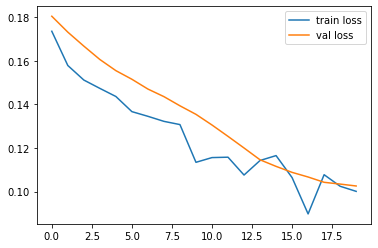

None


LSTM
Foresight =  0


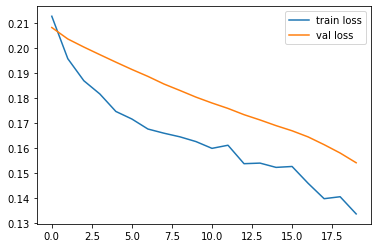

None


GRU
Foresight =  1


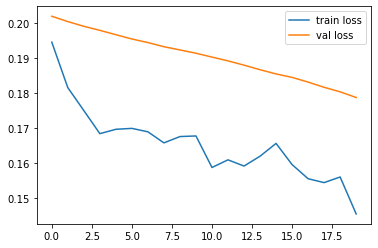

None


LSTM
Foresight =  1


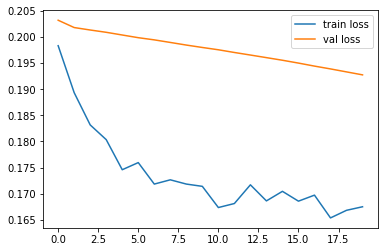

None


GRU
Foresight =  2


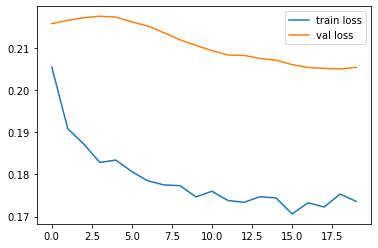

None


LSTM
Foresight =  2


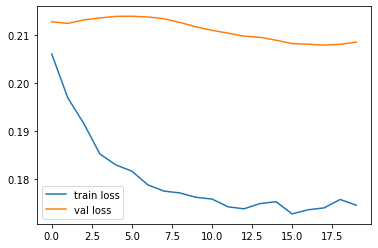

None


GRU
Foresight =  3


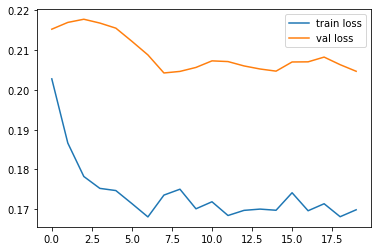

None


LSTM
Foresight =  3


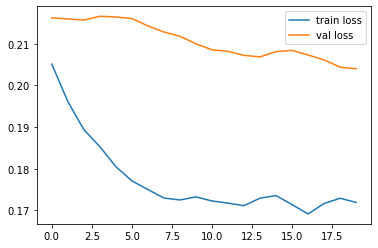

None


GRU
Foresight =  4


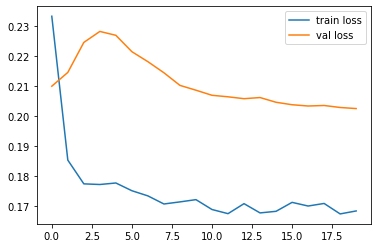

None


LSTM
Foresight =  4


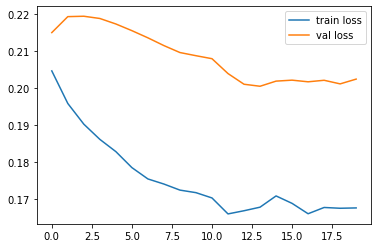

None




In [35]:
for i in range(5):
        
    print("GRU")
    print("Foresight = ",i)
    print(return_GRU_PLOT(Admited_Num,3,i))
    print("\n")

    print("LSTM")
    print("Foresight = ",i)
    print(return_LSTM_PLOT(Admited_Num,3,i))
    print("\n")


## 2. Create a 1d convolutional network model. Explore if stacking lstm or gru layers helps with the performance.


In [36]:
def Conv1d_network_MAE_get(a,look_back,foresight):
    trainPortion = round(a.shape[0] * 0.7)
    valPortion = round(a.shape[0] * 0.15)
    trainData = a[:trainPortion]
    valData = a[trainPortion: trainPortion + valPortion]
    testData = a[trainPortion + valPortion:]

    sc = MinMaxScaler(feature_range=(0,1))

    trainData  =trainData.values
    trainData = trainData.reshape(-1,1)

    valData = valData.values
    valData = valData.reshape(-1,1)

    testData = testData.values
    testData = testData.reshape(-1,1)
    
    sc.fit(trainData)
    trainNorm = sc.transform(trainData)
    valNorm =sc.transform(valData)
    testNorm = sc.transform(testData)
    
    trainNormX, trainNormY = createSeq(trainNorm, look_back = look_back, foresight = foresight)
    valNormX, valNormY = createSeq(valNorm, look_back = look_back, foresight = foresight)
    testNormX, testNormY = createSeq(testNorm, look_back = look_back, foresight = foresight)
    
    trainNormX = np.reshape(trainNormX, (trainNormX.shape[0],trainNormX.shape[1],1))
    valNormX = np.reshape(valNormX, (valNormX.shape[0],valNormX.shape[1],1))
    testNormX = np.reshape(testNormX, (testNormX.shape[0],testNormX.shape[1],1))
    
    #__________Conv1d   
    
    model = Sequential()
    model.add(Conv1D(64,kernel_size=1, activation='relu',input_shape=(look_back,1)))
    model.add(MaxPooling1D(pool_size=1))

    model.add(Flatten())

    model.add(RepeatVector(2))
    
    model.add(Dense(1))

    model.compile(loss='mae',optimizer='adam',metrics=['mean_absolute_error'])
    
    network_name = 'conv1d'
    filepath = network_name + "_epoch -{epoch:02d}-loss-{loss:.4f}-.hdf5"
    checkpoint = ModelCheckpoint(filepath, monitor = 'loss',verbse = 0, save_best_only = True, mode = 'min')
    callbacks_list = [checkpoint]
    network = model.fit(trainNormX, trainNormY, verbose = 0,validation_data = (valNormX, valNormY),epochs = 20, 
                        batch_size = 20, callbacks = callbacks_list)
    
    conv1d_MAE =  model.evaluate(testNormX,testNormY)
    
    return conv1d_MAE[1]

In [37]:
def LSTM_MAE_Conv1(a,look_back,foresight):
    trainPortion = round(a.shape[0] * 0.7)
    valPortion = round(a.shape[0] * 0.15)
    trainData = a[:trainPortion]
    valData = a[trainPortion: trainPortion + valPortion]
    testData = a[trainPortion + valPortion:]

    sc = MinMaxScaler(feature_range=(0,1))

    trainData  =trainData.values
    trainData = trainData.reshape(-1,1)

    valData = valData.values
    valData = valData.reshape(-1,1)

    testData = testData.values
    testData = testData.reshape(-1,1)
    
    sc.fit(trainData)
    trainNorm = sc.transform(trainData)
    valNorm =sc.transform(valData)
    testNorm = sc.transform(testData)
    
    trainNormX, trainNormY = createSeq(trainNorm, look_back = look_back, foresight = foresight)
    valNormX, valNormY = createSeq(valNorm, look_back = look_back, foresight = foresight)
    testNormX, testNormY = createSeq(testNorm, look_back = look_back, foresight = foresight)
    
    trainNormX = np.reshape(trainNormX, (trainNormX.shape[0],trainNormX.shape[1],1))
    valNormX = np.reshape(valNormX, (valNormX.shape[0],valNormX.shape[1],1))
    testNormX = np.reshape(testNormX, (testNormX.shape[0],testNormX.shape[1],1))
    
    #__________Conv1d   
    
    model = Sequential()
    model.add(Conv1D(64,kernel_size=1, activation='relu',input_shape=(look_back,1)))
    model.add(MaxPooling1D(pool_size=1))

    model.add(Flatten())

    model.add(RepeatVector(2))
    
    #__________LSTM 
    model.add(LSTM(64,activation='relu'))
    model.add(Dense(1))

    model.compile(loss='mae',optimizer='adam',metrics=['mean_absolute_error'])

    
    network_name = 'lstm'
    filepath = network_name + "_epoch -{epoch:02d}-loss-{loss:.4f}-.hdf5"
    checkpoint = ModelCheckpoint(filepath, monitor = 'loss',verbse = 0, save_best_only = True, mode = 'min')
    callbacks_list = [checkpoint]
    network = model.fit(trainNormX, trainNormY, verbose = 0,validation_data = (valNormX, valNormY),epochs = 20, 
                        batch_size = 20, callbacks = callbacks_list)
    
    LSTM_MAE =  model.evaluate(testNormX,testNormY)
    
    return LSTM_MAE[1]

In [38]:
def GRU_MAE_Conv1(a,look_back,foresight):
    trainPortion = round(a.shape[0] * 0.7)
    valPortion = round(a.shape[0] * 0.15)
    trainData = a[:trainPortion]
    valData = a[trainPortion: trainPortion + valPortion]
    testData = a[trainPortion + valPortion:]

    sc = MinMaxScaler(feature_range=(0,1))

    trainData  =trainData.values
    trainData = trainData.reshape(-1,1)

    valData = valData.values
    valData = valData.reshape(-1,1)

    testData = testData.values
    testData = testData.reshape(-1,1)
    
    sc.fit(trainData)
    trainNorm = sc.transform(trainData)
    valNorm =sc.transform(valData)
    testNorm = sc.transform(testData)
    
    trainNormX, trainNormY = createSeq(trainNorm, look_back = look_back, foresight = foresight)
    valNormX, valNormY = createSeq(valNorm, look_back = look_back, foresight = foresight)
    testNormX, testNormY = createSeq(testNorm, look_back = look_back, foresight = foresight)
    
    trainNormX = np.reshape(trainNormX, (trainNormX.shape[0],trainNormX.shape[1],1))
    valNormX = np.reshape(valNormX, (valNormX.shape[0],valNormX.shape[1],1))
    testNormX = np.reshape(testNormX, (testNormX.shape[0],testNormX.shape[1],1))
    
    #__________Conv1d
    
    model = Sequential()
    model.add(Conv1D(64,kernel_size=1, activation='relu',input_shape=(look_back,1)))
    model.add(MaxPooling1D(pool_size=1))

    model.add(Flatten())

    model.add(RepeatVector(2))
    
    #__________GRU
    
    model.add(GRU(64,activation='relu'))

    model.add(Dense(1))
    model.compile(loss='mae',optimizer='adam',metrics=['mean_absolute_error'])

    network_name = 'gru'
    filepath = network_name + "_epoch -{epoch:02d}-loss-{loss:.4f}-.hdf5"
    checkpoint = ModelCheckpoint(filepath, monitor = 'loss',verbse = 0, save_best_only = True, mode = 'min')
    callbacks_list = [checkpoint]
    network = model.fit(trainNormX, trainNormY, verbose = 0, validation_data = (valNormX, valNormY),epochs = 20, 
                        batch_size = 20, callbacks = callbacks_list)
    
    GRU_MAE =  model.evaluate(testNormX,testNormY)
    
    return  GRU_MAE[1]

### (a) Report the MAE of the test set on your best model.

In [39]:
MAE = 1000
back = 3
fore = 0
LSTM_con1d_MAE = 0
GRU_con1d_MAE = 0
Conv1d_network_MAE = 0

for j in range(5):
    
    mae1,mae2,mae3  = LSTM_MAE_Conv1(Admited_Num,back,j),GRU_MAE_Conv1(Admited_Num,back,j),Conv1d_network_MAE_get(Admited_Num,back,j)
    
    LSTM_con1d_MAE+= mae1
    GRU_con1d_MAE+= mae2
    Conv1d_network_MAE += mae3

if GRU_con1d_MAE < LSTM_con1d_MAE and GRU_con1d_MAE< Conv1d_network_MAE:
    print("GRU is best, the average mae is")
    mean_GRU_con1d_MAE = GRU_con1d_MAE/5
    print(mean_GRU_con1d_MAE)
    
elif LSTM_con1d_MAE < GRU_con1d_MAE and LSTM_con1d_MAE<Conv1d_network_MAE:
    print("LSTM is best, the average mae is")
    mean_LSTM_con1d_MAE = LSTM_con1d_MAE/5
    print(mean_LSTM_con1d_MAE)
    
elif Conv1d_network_MAE < GRU_con1d_MAE and Conv1d_network_MAE<LSTM_con1d_MAE:
    print("Conv1d is best, the average mae is")
    mean_Conv1d_network_MAE = Conv1d_network_MAE/5
    print(mean_Conv1d_network_MAE)
    
else:
    print()

1/1 [==============================] - 0s 998us/step - loss: 0.1475 - mean_absolute_error: 0.1475
GRU is best, the average mae is
0.1038574431091547



### (b) Plot the loss curves for training and validation sets.


In [40]:
def LSTM_plot_Conv1(a,look_back,foresight):
    trainPortion = round(a.shape[0] * 0.7)
    valPortion = round(a.shape[0] * 0.15)
    trainData = a[:trainPortion]
    valData = a[trainPortion: trainPortion + valPortion]
    testData = a[trainPortion + valPortion:]

    sc = MinMaxScaler(feature_range=(0,1))

    trainData  =trainData.values
    trainData = trainData.reshape(-1,1)

    valData = valData.values
    valData = valData.reshape(-1,1)

    testData = testData.values
    testData = testData.reshape(-1,1)
    
    sc.fit(trainData)
    trainNorm = sc.transform(trainData)
    valNorm =sc.transform(valData)
    testNorm = sc.transform(testData)
    
    trainNormX, trainNormY = createSeq(trainNorm, look_back = look_back, foresight = foresight)
    valNormX, valNormY = createSeq(valNorm, look_back = look_back, foresight = foresight)
    testNormX, testNormY = createSeq(testNorm, look_back = look_back, foresight = foresight)
    
    trainNormX = np.reshape(trainNormX, (trainNormX.shape[0],trainNormX.shape[1],1))
    valNormX = np.reshape(valNormX, (valNormX.shape[0],valNormX.shape[1],1))
    testNormX = np.reshape(testNormX, (testNormX.shape[0],testNormX.shape[1],1))
    
    #__________Conv1d   
    
    model = Sequential()
    model.add(Conv1D(64,kernel_size=1, activation='relu',input_shape=(look_back,1)))
    model.add(MaxPooling1D(pool_size=1))

    model.add(Flatten())

    model.add(RepeatVector(2))
    
    #__________LSTM 
    model.add(LSTM(64,activation='relu'))
    model.add(Dense(1))

    model.compile(loss='mae',optimizer='adam',metrics=['mean_absolute_error'])

    network_name = 'lstm'
    filepath = network_name + "_epoch -{epoch:02d}-loss-{loss:.4f}-.hdf5"
    checkpoint = ModelCheckpoint(filepath, monitor = 'loss',verbse = 0, save_best_only = True, mode = 'min')
    callbacks_list = [checkpoint]
    network = model.fit(trainNormX, trainNormY, verbose = 0,validation_data = (valNormX, valNormY),epochs = 20, 
                        batch_size = 20, callbacks = callbacks_list)
    
    plt.plot(network.history['loss'],label = 'train loss')
    plt.plot(network.history['val_loss'],label = 'val loss')
    plt.legend()
    plt.show()


In [41]:
def GRU_plot_Conv1(a,look_back,foresight):
    trainPortion = round(a.shape[0] * 0.7)
    valPortion = round(a.shape[0] * 0.15)
    trainData = a[:trainPortion]
    valData = a[trainPortion: trainPortion + valPortion]
    testData = a[trainPortion + valPortion:]

    sc = MinMaxScaler(feature_range=(0,1))

    trainData  =trainData.values
    trainData = trainData.reshape(-1,1)

    valData = valData.values
    valData = valData.reshape(-1,1)

    testData = testData.values
    testData = testData.reshape(-1,1)
    
    sc.fit(trainData)
    trainNorm = sc.transform(trainData)
    valNorm =sc.transform(valData)
    testNorm = sc.transform(testData)
    
    trainNormX, trainNormY = createSeq(trainNorm, look_back = look_back, foresight = foresight)
    valNormX, valNormY = createSeq(valNorm, look_back = look_back, foresight = foresight)
    testNormX, testNormY = createSeq(testNorm, look_back = look_back, foresight = foresight)
    
    trainNormX = np.reshape(trainNormX, (trainNormX.shape[0],trainNormX.shape[1],1))
    valNormX = np.reshape(valNormX, (valNormX.shape[0],valNormX.shape[1],1))
    testNormX = np.reshape(testNormX, (testNormX.shape[0],testNormX.shape[1],1))
    
    #__________Conv1d
    
    model = Sequential()
    model.add(Conv1D(64,kernel_size=1, activation='relu',input_shape=(look_back,1)))
    model.add(MaxPooling1D(pool_size=1))

    model.add(Flatten())

    model.add(RepeatVector(2))
    
    #__________GRU
    
    model.add(GRU(64,activation='relu'))

    model.add(Dense(1))
    model.compile(loss='mae',optimizer='adam',metrics=['mean_absolute_error'])

    network_name = 'gru'
    filepath = network_name + "_epoch -{epoch:02d}-loss-{loss:.4f}-.hdf5"
    checkpoint = ModelCheckpoint(filepath, monitor = 'loss',verbse = 0, save_best_only = True, mode = 'min')
    callbacks_list = [checkpoint]
    network = model.fit(trainNormX, trainNormY, verbose = 0, validation_data = (valNormX, valNormY),epochs = 20, 
                        batch_size = 20, callbacks = callbacks_list)
    
    plt.plot(network.history['loss'],label = 'train loss')
    plt.plot(network.history['val_loss'],label = 'val loss')
    plt.legend()
    plt.show()


In [42]:
def Conv1d_network_plot(a,look_back,foresight):
    trainPortion = round(a.shape[0] * 0.7)
    valPortion = round(a.shape[0] * 0.15)
    trainData = a[:trainPortion]
    valData = a[trainPortion: trainPortion + valPortion]
    testData = a[trainPortion + valPortion:]

    sc = MinMaxScaler(feature_range=(0,1))

    trainData  =trainData.values
    trainData = trainData.reshape(-1,1)

    valData = valData.values
    valData = valData.reshape(-1,1)

    testData = testData.values
    testData = testData.reshape(-1,1)
    
    sc.fit(trainData)
    trainNorm = sc.transform(trainData)
    valNorm =sc.transform(valData)
    testNorm = sc.transform(testData)
    
    trainNormX, trainNormY = createSeq(trainNorm, look_back = look_back, foresight = foresight)
    valNormX, valNormY = createSeq(valNorm, look_back = look_back, foresight = foresight)
    testNormX, testNormY = createSeq(testNorm, look_back = look_back, foresight = foresight)
    
    trainNormX = np.reshape(trainNormX, (trainNormX.shape[0],trainNormX.shape[1],1))
    valNormX = np.reshape(valNormX, (valNormX.shape[0],valNormX.shape[1],1))
    testNormX = np.reshape(testNormX, (testNormX.shape[0],testNormX.shape[1],1))
    
    #__________Conv1d   
    
    model = Sequential()
    model.add(Conv1D(64,kernel_size=1, activation='relu',input_shape=(look_back,1)))
    model.add(MaxPooling1D(pool_size=1))

    model.add(Flatten())

    model.add(RepeatVector(2))
    
    model.add(Dense(1))

    model.compile(loss='mae',optimizer='adam',metrics=['mean_absolute_error'])
    
    network_name = 'conv1d'
    filepath = network_name + "_epoch -{epoch:02d}-loss-{loss:.4f}-.hdf5"
    checkpoint = ModelCheckpoint(filepath, monitor = 'loss',verbse = 0, save_best_only = True, mode = 'min')
    callbacks_list = [checkpoint]
    network = model.fit(trainNormX, trainNormY, verbose = 0,validation_data = (valNormX, valNormY),epochs = 20, 
                        batch_size = 20, callbacks = callbacks_list)
    
    plt.plot(network.history['loss'],label = 'train loss')
    plt.plot(network.history['val_loss'],label = 'val loss')
    plt.legend()
    plt.show()


Conv1d
Foresight =  0


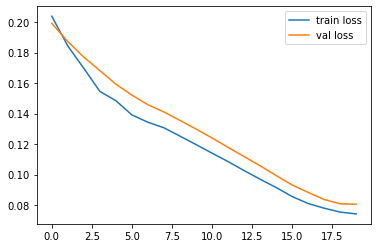

None


GRU
Foresight =  0


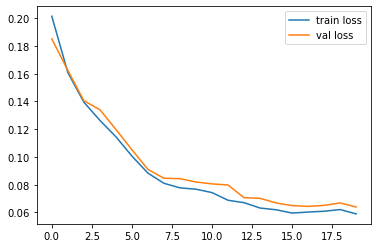

None


LSTM
Foresight =  0


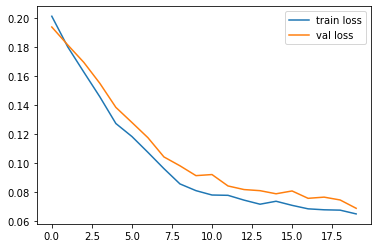

None


Conv1d
Foresight =  1


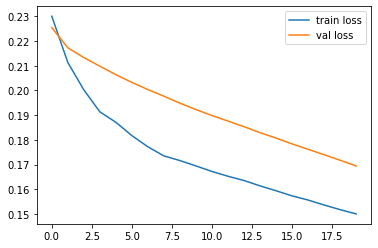

None


GRU
Foresight =  1


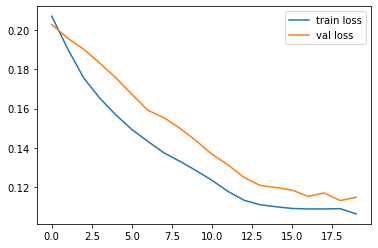

None


LSTM
Foresight =  1


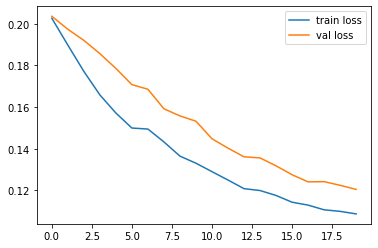

None


Conv1d
Foresight =  2


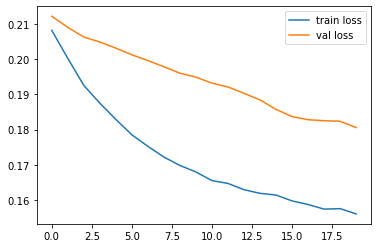

None


GRU
Foresight =  2


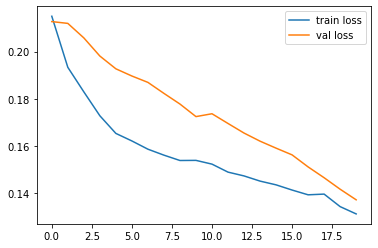

None


LSTM
Foresight =  2


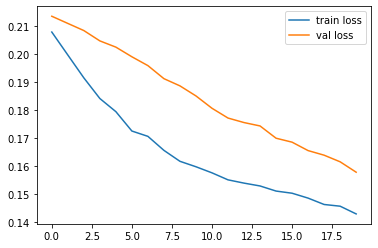

None


Conv1d
Foresight =  3


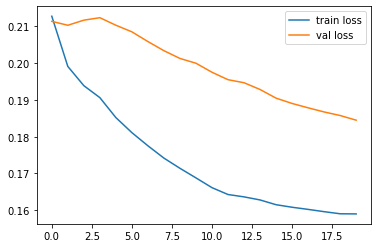

None


GRU
Foresight =  3


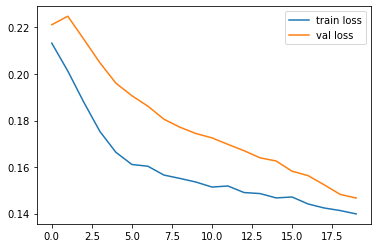

None


LSTM
Foresight =  3


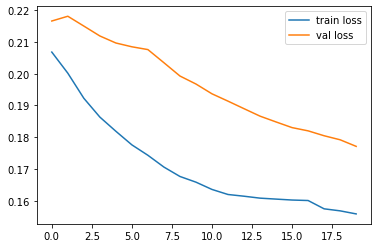

None


Conv1d
Foresight =  4


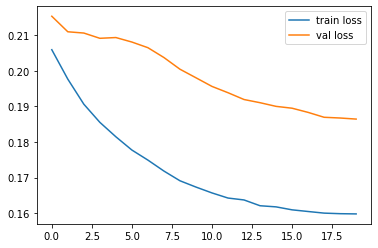

None


GRU
Foresight =  4


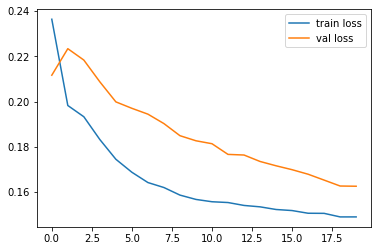

None


LSTM
Foresight =  4


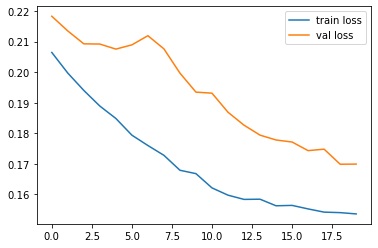

None




In [43]:
for i in range(5):
        
    print("Conv1d")
    print("Foresight = ",i)
    print(Conv1d_network_plot(Admited_Num,3,i))
    print("\n")
    
    print("GRU")
    print("Foresight = ",i)
    print(GRU_plot_Conv1(Admited_Num,3,i))
    print("\n")

    print("LSTM")
    print("Foresight = ",i)
    print(LSTM_plot_Conv1(Admited_Num,3,i))
    print("\n")
    

## 3. Use any machine learning model (Linear Regression, KNN, Random Forests, regular deep NN, etc.) or an ensemble of models to achieve the lowest MAE.



### (a) Report the MAE of the test set on your best model.



In [44]:
def RegularNN(a,look_back,foresight):
    trainPortion = round(a.shape[0] * 0.7)
    valPortion = round(a.shape[0] * 0.15)
    trainData = a[:trainPortion]
    valData = a[trainPortion: trainPortion + valPortion]
    testData = a[trainPortion + valPortion:]

    sc = MinMaxScaler(feature_range=(0,1))

    trainData  =trainData.values
    trainData = trainData.reshape(-1,1)

    valData = valData.values
    valData = valData.reshape(-1,1)

    testData = testData.values
    testData = testData.reshape(-1,1)
    
    sc.fit(trainData)
    trainNorm = sc.transform(trainData)
    valNorm =sc.transform(valData)
    testNorm = sc.transform(testData)
    
    trainNormX, trainNormY = createSeq(trainNorm, look_back = look_back, foresight = foresight)
    valNormX, valNormY = createSeq(valNorm, look_back = look_back, foresight = foresight)
    testNormX, testNormY = createSeq(testNorm, look_back = look_back, foresight = foresight)

    trainNormX=np.reshape(trainNormX,(trainNormX.shape[0],trainNormX.shape[1]))
    valNormX=np.reshape(valNormX,(valNormX.shape[0],valNormX.shape[1]))
    testNormX=np.reshape(testNormX,(testNormX.shape[0],testNormX.shape[1]))

    model = Sequential()
    model.add(Dense(64, input_shape=(look_back,), activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mae',metrics=['mean_absolute_error'])

    network = model.fit(trainNormX,trainNormY,validation_data=(valNormX,valNormY),verbose = 0,epochs=100,batch_size=64)
    
    RegularNN_MAE =  model.evaluate(testNormX,testNormY)
    
    return  RegularNN_MAE[1]

In [45]:
Regular_NN_mae = 0
for j in range(5):

    Regular_NN_mae += RegularNN(Admited_Num,3,i)
    
mean_Regular_mae = Regular_NN_mae/5
    
print("Regular NN 's average mae is", mean_Regular_mae)

1/1 [==============================] - 0s 990us/step - loss: 0.1581 - mean_absolute_error: 0.1581
Regular NN 's average mae is 0.15997421145439147


### (b) Plot the loss curves for training and validation sets.


In [46]:
def RegularNN_plot(a,look_back,foresight):
    trainPortion = round(a.shape[0] * 0.7)
    valPortion = round(a.shape[0] * 0.15)
    trainData = a[:trainPortion]
    valData = a[trainPortion: trainPortion + valPortion]
    testData = a[trainPortion + valPortion:]

    sc = MinMaxScaler(feature_range=(0,1))

    trainData  =trainData.values
    trainData = trainData.reshape(-1,1)

    valData = valData.values
    valData = valData.reshape(-1,1)

    testData = testData.values
    testData = testData.reshape(-1,1)
    
    sc.fit(trainData)
    trainNorm = sc.transform(trainData)
    valNorm =sc.transform(valData)
    testNorm = sc.transform(testData)
    
    trainNormX, trainNormY = createSeq(trainNorm, look_back = look_back, foresight = foresight)
    valNormX, valNormY = createSeq(valNorm, look_back = look_back, foresight = foresight)
    testNormX, testNormY = createSeq(testNorm, look_back = look_back, foresight = foresight)

    trainNormX=np.reshape(trainNormX,(trainNormX.shape[0],trainNormX.shape[1]))
    valNormX=np.reshape(valNormX,(valNormX.shape[0],valNormX.shape[1]))
    testNormX=np.reshape(testNormX,(testNormX.shape[0],testNormX.shape[1]))

    model = Sequential()
    model.add(Dense(64, input_shape=(look_back,), activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mae',metrics=['mean_absolute_error'])

    network = model.fit(trainNormX,trainNormY,validation_data=(valNormX,valNormY),verbose = 0,epochs=100,batch_size=64)
    
    plt.plot(network.history['loss'],label = 'train loss')
    plt.plot(network.history['val_loss'],label = 'val loss')
    plt.legend()
    plt.show()


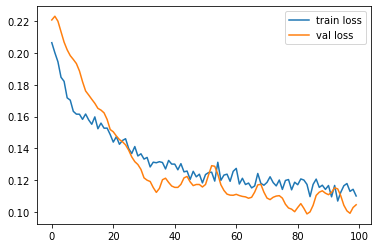

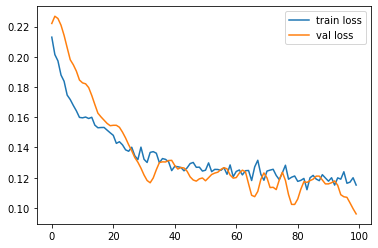

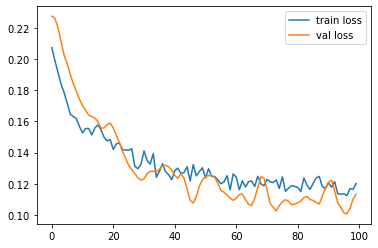

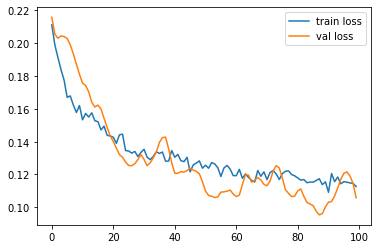

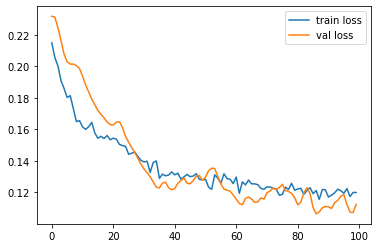

In [47]:
for j in range(5):

    RegularNN_plot(Admited_Num,3,i)

## 4. Comment on the performance of the your models.

In [48]:
print("mean_GRUMAE:",mean_GRUMAE)
print("\n")
print("mean LSTMMAE",LSTMMAE/5)
print("\n")
print("mean_RegularNN_mae",Regular_NN_mae/5)
print("\n")
print("mean GRU_con1d_MAE",GRU_con1d_MAE/5)
print("\n")
print("mean LSTM_con1d_MAE",LSTM_con1d_MAE/5)
print("\n")
print("mean Conv1d_network_MAE",Conv1d_network_MAE/5)

mean_GRUMAE: 0.10743176639080047


mean LSTMMAE 0.11895059198141097


mean_RegularNN_mae 0.15997421145439147


mean GRU_con1d_MAE 0.1038574431091547


mean LSTM_con1d_MAE 0.10913683772087097


mean Conv1d_network_MAE 0.11185993254184723


##### 1. After calculating mae, we find "GRU" performs better than "LSTM". 
##### 2. After adding 1d convolutional network model, the mae becomes smaller and the plot fits better. 
##### 3. We use deep NN but it doesn't performs better than the previous best model.